# TASK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from seaborn import heatmap, diverging_palette, histplot, scatterplot, barplot, violinplot, boxplot
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
class Utils:
    @staticmethod
    def missing_report(data):
        nan_values = pd.DataFrame()
        nan_values['missing_count'] = data.isna().sum()
        nan_values['missing_percentage'] = nan_values['missing_count'] / data.shape[0]

        return nan_values.round(4)
    
    @staticmethod
    def encode_categories(data):
        le = LabelEncoder()
        numericData = pd.DataFrame(data.select_dtypes(include=['number']))
        labels = dict()
        cat_cols = data.select_dtypes(include=['category', 'object']).columns
        for col in cat_cols:
            le.fit(data[col])
            numericData[col] = le.transform(data[col])
            labels[col] = dict(zip(le.classes_, le.transform(le.classes_)))
        return numericData, labels
    
    @staticmethod
    def fill_missings(data: pd.DataFrame):
        numeric = data.select_dtypes(include=['number']).columns
        data[numeric] = data[numeric].fillna(data[numeric].mean())

        categorical = data.select_dtypes(include=['category', 'object']).columns
        data[categorical] = data[categorical].fillna(data[categorical].mode().iloc[0])

    @staticmethod
    def corr_heatmap(data):
        corr = data.corr()

        plt.figure(figsize=(20, 20))
        cmap = diverging_palette(220, 220, as_cmap=True)
        heatmap(corr, annot=True, fmt=".3f", cmap = cmap, linewidths=1, square=True, center=0, vmax=1, vmin=-1)
        plt.show()

### 1.1

1.1.1 Read File

In [3]:
data = pd.read_csv('task1.csv')
data.select_dtypes(include=['number'])

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


#### 1.1.2 `info`


`info()`: Provides a concise summary of a DataFrame, including the column names, data types, and non-null counts.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### 1.1.3 `head` and `tail`


`head(n)`: Returns the first n rows of a DataFrame, allowing you to quickly inspect the beginning of the data.

`tail(n)`: Returns the last n rows of a DataFrame, allowing you to quickly inspect the end of the data.

In [5]:
print('first 5 rows:')
display(data.head())
print('last 5 rows:')
display(data.tail())

first 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


last 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### 1.1.4 `describe`

`describe()`: Generates descriptive statistics of a DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns.

In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.2 

#### 1.2.1 Columns Data Types

In [7]:
data.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

#### 1.2.2 Label Encoding

Label encoding is a process of converting categorical variables into numerical labels. Each unique category is assigned a numerical value

In [8]:
numericData, labels = Utils.encode_categories(data)
numericData

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,deck,embark_town,alive
0,0,3,22.0,1,0,7.2500,1,2,2,1,7,2,0
1,1,1,38.0,1,0,71.2833,0,0,0,2,2,0,1
2,1,3,26.0,0,0,7.9250,0,2,2,2,7,2,1
3,1,1,35.0,1,0,53.1000,0,2,0,2,2,2,1
4,0,3,35.0,0,0,8.0500,1,2,2,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2,1,1,7,2,0
887,1,1,19.0,0,0,30.0000,0,2,0,2,1,2,1
888,0,3,NaN,1,2,23.4500,0,2,2,2,7,2,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,2,0,1


In [9]:
labels

{'sex': {'female': 0, 'male': 1},
 'embarked': {'C': 0, 'Q': 1, 'S': 2, nan: 3},
 'class': {'First': 0, 'Second': 1, 'Third': 2},
 'who': {'child': 0, 'man': 1, 'woman': 2},
 'deck': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, nan: 7},
 'embark_town': {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2, nan: 3},
 'alive': {'no': 0, 'yes': 1}}

### 1.3 Correlation Heatmap


The correlation coefficient ranges from -1 to 1. A value of -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation. The correlation heatmap provides a visual way to assess the relationships between multiple variables in a dataset.

$$

\rho_{X,Y} = \frac{{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}}{{\sqrt{\sum{(X_i - \bar{X})^2}\sum{(Y_i - \bar{Y})^2}}}}

$$
where:
- $\rho_{X,Y}$ represents the correlation coefficient between variables X and Y.
- $X_i and Y_i$ are the individual data points of X and Y, respectively.
- $\bar{X}$ and \(\bar{Y}\)$ are the means of X and Y, respectively.
- $\sum$ denotes the summation symbol.



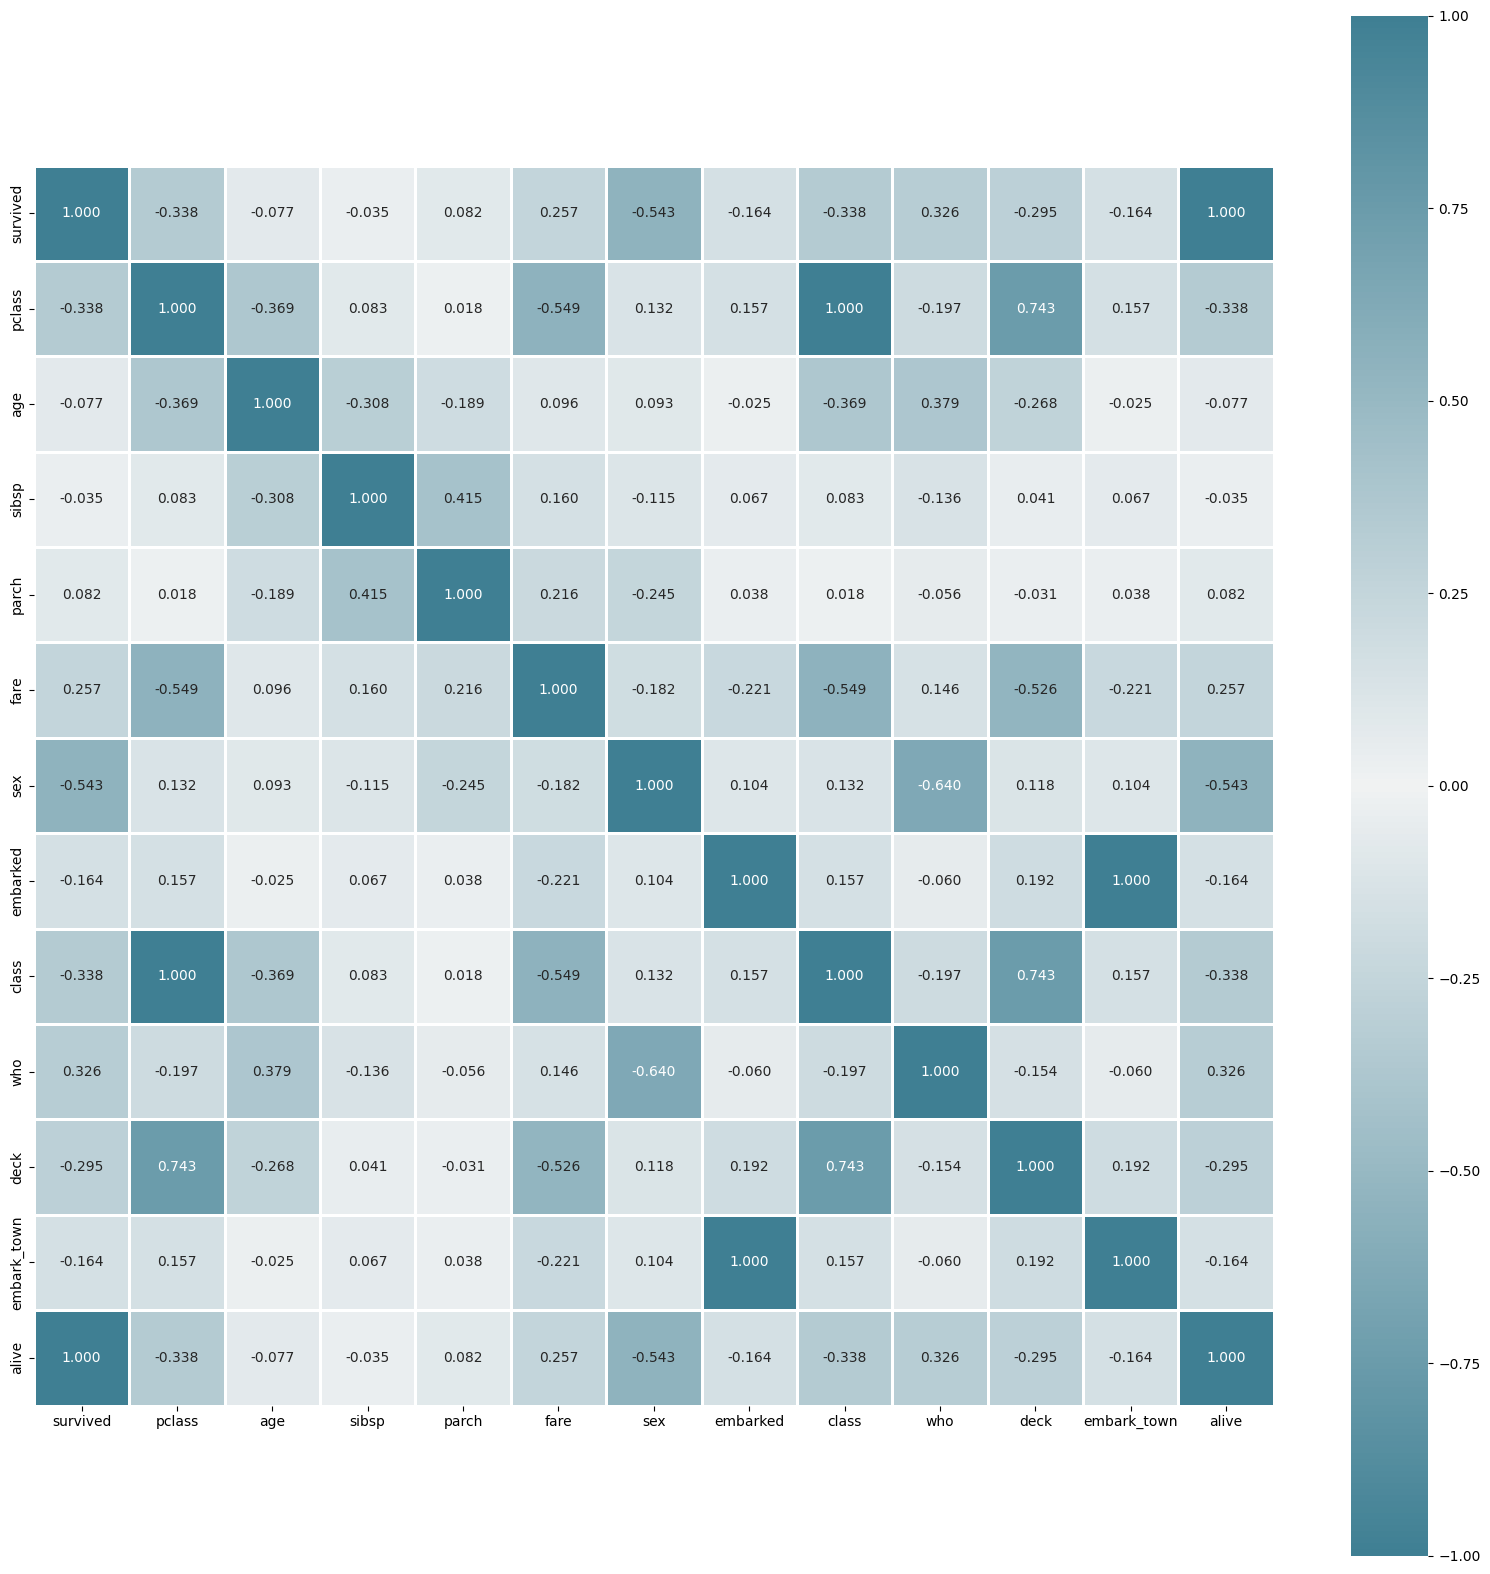

In [10]:
Utils.corr_heatmap(numericData)

### 1.4 Remove Unnecessary Columns

As we can see, both `embark` and `embark_town` are identical and also `survived` and `alive` are showing the same thing.

In [11]:
data.drop(columns=['alive', 'embark_town'], inplace=True)

### 1.5

**How many passengers survived (survived == 1) the disaster?**

In [12]:
data[data['survived'] == 1].shape[0]

342

### 1.6

**Find all female passengers aged more than 30 years. How many are there?**

In [13]:
female_more_than_30 = data[(data['sex'] == 'female') & (data['age'] >= 30)]
female_more_than_30.shape[0]

114

### 1.7

**Identify passengers who embarked from Cherbourg ('C') and paid a fare greater than$100.**

In [14]:
embarked_c_fair_more_than_100 = data[(data['embarked'] == 'C') & (data['fare'] >= 100)]
embarked_c_fair_more_than_100 = numericData[(numericData['embarked'] == 2) & (numericData['fare'] >= 100)]
embarked_c_fair_more_than_100.shape[0]

24

### 1.8 Missing Values

Missing values refer to the absence or lack of data in a dataset for certain variables or observations. There are several methods to handle missing values.

- `Deletion`: In this approach, rows or columns with missing values are removed from the dataset.

- `Mean/median imputation`: In this approach, you calculate the mean or median of the available values for a particular feature and use that value to fill in the missing values. It's a simple method that works well for numerical data.

- `Mode imputation`: For categorical or discrete data, you can use the mode (most frequent value) to fill in missing values. It's similar to mean/median imputation but applied to categorical variables.

- `Forward fill`: This method involves propagating the last observed value forward to fill in missing values. It's useful when dealing with time series or sequential data.

- `Backward fill`: This method is the opposite of forward fill. It propagates the next observed value backward to fill in missing values. It's also applicable to time series or sequential data.

- `Regression imputation`: Regression-based imputation involves using regression models to predict missing values based on other variables in the dataset. You can train a regression model using the available data and use it to predict missing values.

- `K-nearest neighbors imputation`: KNN imputation involves finding the K nearest neighbors of a sample with missing values and filling in those missing values with the average or median of the values from the nearest neighbors. It works well when there is some underlying pattern or similarity in the data.




In [15]:
Utils.missing_report(data)

,missing_count,missing_percentage
survived,0,0.0000
pclass,0,0.0000
sex,0,0.0000
age,177,0.1987
sibsp,0,0.0000
parch,0,0.0000
fare,0,0.0000
embarked,2,0.0022
class,0,0.0000
who,0,0.0000


- We delete `deck` feature because about 78% of it is missing, so imputation does not work well in this case.

- We also use mean imputation for `age` and mode imputation for `embarked`.

In [16]:
data.drop(columns=['deck'], inplace=True)

In [17]:
Utils.fill_missings(data)
Utils.missing_report(data)


,missing_count,missing_percentage
survived,0,0.0
pclass,0,0.0
sex,0,0.0
age,0,0.0
sibsp,0,0.0
parch,0,0.0
fare,0,0.0
embarked,0,0.0
class,0,0.0
who,0,0.0


### 1.9
**What is the average age of passengers on the ship? How does it differ between males and females?**

In [18]:
print(f"male age average: {data[data['sex'] == 'male']['age'].mean():.2f}")
print(f"male age average: {data[data['sex'] == 'female']['age'].mean():.2f}")


male age average: 30.51
male age average: 28.22


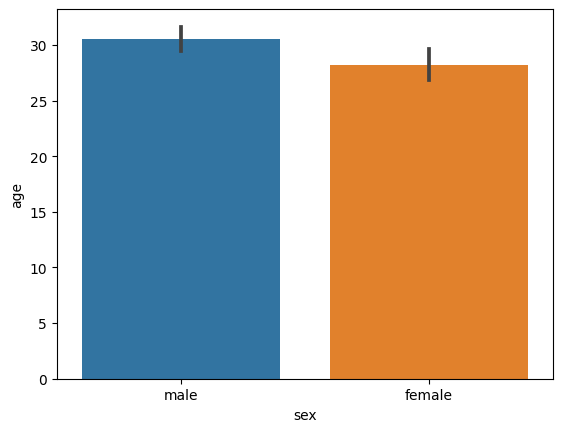

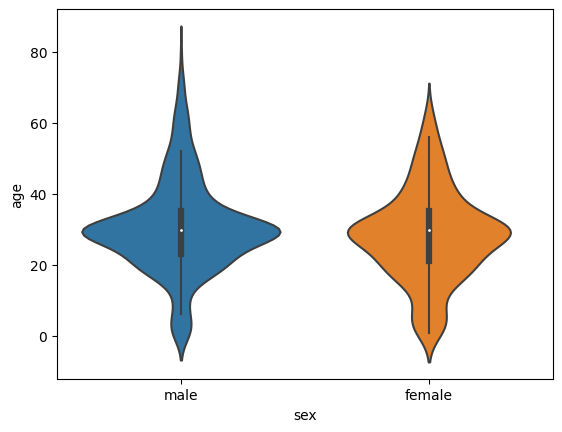

In [19]:
barplot(
    data = data,
    x = 'sex',
    y = 'age',
    estimator='mean'
)
plt.show()
violinplot(
    data = data,
    x = 'sex',
    y = 'age',
    estimator='mean'
)
plt.show()

### 1.10

**Is there a correlation between fare paid and survival rate? Provide a statistical summary.**

As we can see there is a weak correlation between paid fare and surviving status.

In [20]:
print(numericData.corr()['survived']['fare'])

0.2573065223849626


We can also do a t-test:

- $H_0$: The difference of mean fare paid in two groups(survived and not survived) is not significant and it is random.
- $H_A$: They are significantly different from each other.

In [21]:
survived = data[data['survived'] == 1]['fare']
notSurvived = data[data['survived'] == 0]['fare']
t_statistic, p_value = stats.ttest_ind(survived, notSurvived)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 7.939191660871055
P-Value: 6.120189341924198e-15


We can see null hypothesis is rejected.

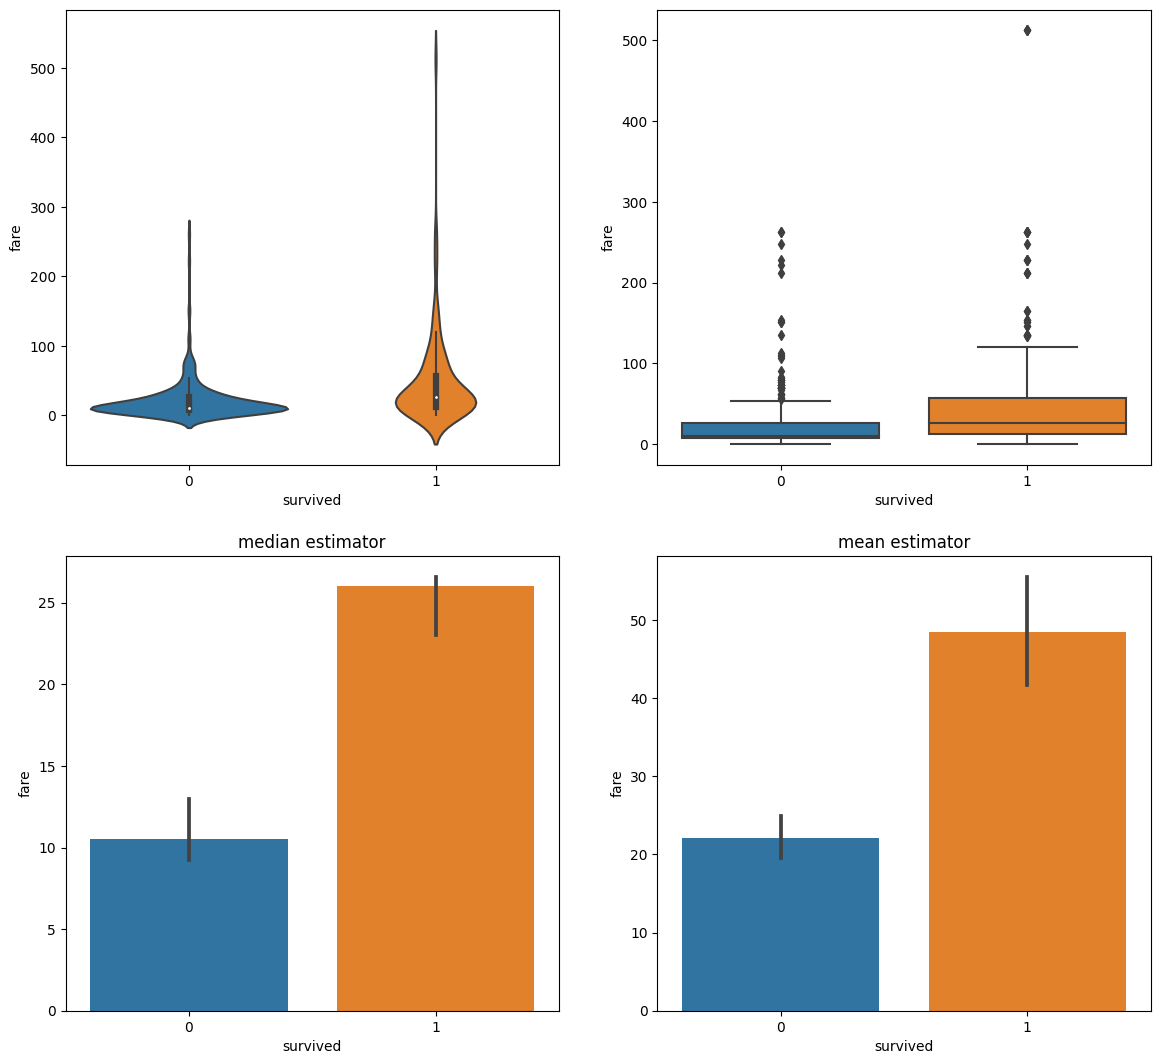

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,13))

violinplot(
    data = data,
    x = 'survived',
    y = 'fare',
    ax = axes[0][0],
)
boxplot(
    data = data,
    x = 'survived',
    y = 'fare',
    ax = axes[0][1]
)
barplot(
    data = data,
    x = 'survived',
    y = 'fare',
    estimator = np.median,
    ax = axes[1][0]
)
axes[1][0].set_title('median estimator')
barplot(
    data = data,
    x = 'survived',
    y = 'fare',
    estimator = np.mean,
    ax = axes[1][1]
)
axes[1][1].set_title('mean estimator')

plt.show()

As we can see in the plots, the people who paid more are more likely to survive.

### 1.11

**proportion of passengers that survived by class.**

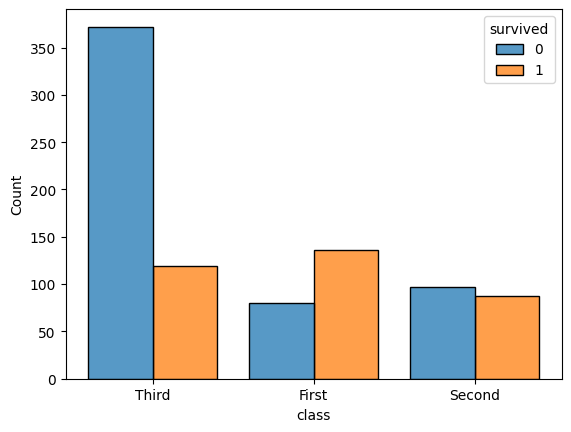

In [23]:
histplot(
    x = data['class'],
    hue = data['survived'],
    multiple="dodge",
    shrink=.8
)
plt.show()

### 1.12

**Plot the age distribution of passengers, distinguishing between those who survived and those who didn't.**

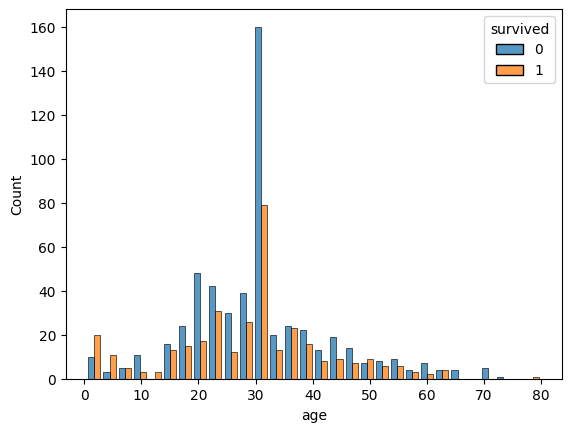

In [24]:
histplot(
    data = data,
    x = 'age',
    hue = 'survived',

    multiple = "dodge",
    shrink=0.8
)
plt.show()

### 1.13

**Create a scatter plot showing the relationship between age and fare paid, color-coded by survival.**

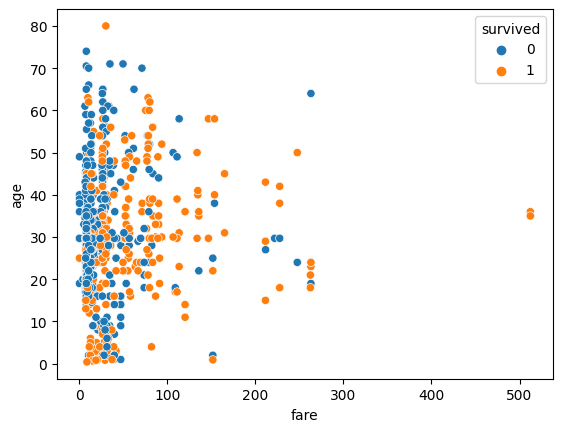

In [25]:
scatterplot(
    data = data,
    x = 'fare',
    y = 'age',

    hue = 'survived'
)

plt.show()

### 1.14

**Create a pivot table to show the average fare and survival rate for each class and sex combination.**

In [26]:
pd.pivot_table(
    data, 
    values = ['fare', 'survived'], 
    index = ['class', 'sex'], 
    aggfunc = {'fare': 'mean', 'survived': 'mean'}
)

fare  survived
class  sex                         
First  female  106.125798  0.968085
       male     67.226127  0.368852
Second female   21.970121  0.921053
       male     19.741782  0.157407
Third  female   16.118810  0.500000
       male     12.661633  0.135447

### 1.15

**Plot a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status.**

fare
class  survived           
First  0         64.684007
       1         95.608029
Second 0         19.412328
       1         22.055700
Third  0         13.669364
       1         13.694887

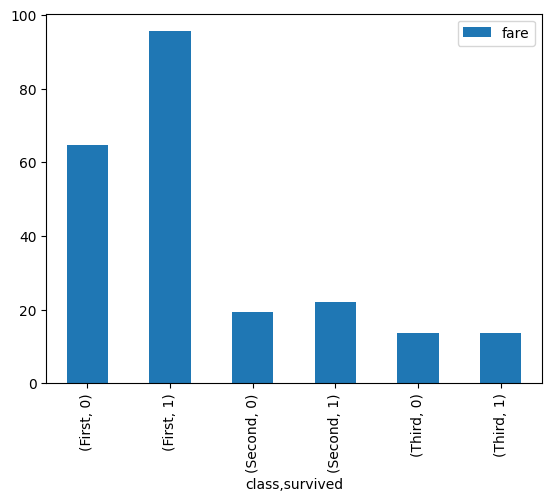

In [27]:
ptable = pd.pivot_table(
    data, 
    values = ['fare'], 
    index = ['class', 'survived'], 
    aggfunc = {'fare': 'mean'}
)
display(ptable)
ptable.plot(kind = 'bar')

plt.show()

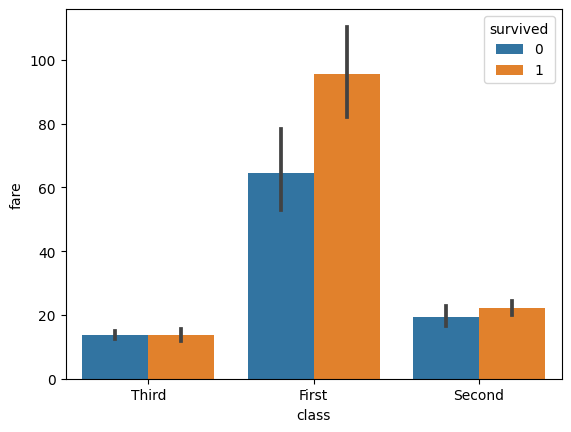

In [28]:
barplot(
    data = data,
    x = 'class',
    hue = 'survived',
    y = 'fare',
    estimator = 'mean'
)

plt.show()